<a href="https://colab.research.google.com/github/vendiutomo/Predict-Customer-Personality-to-Boost-Marketing-Campaign-by-Using-Machine-Learning/blob/main/Predict_Customer_Personality_Vendi_Utomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from matplotlib import rcParams

from scipy.stats import chi2_contingency
from scipy import stats

from datetime import datetime

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

rcParams["figure.figsize"]= (10,7)
rcParams["lines.linewidth"]= 2.5
rcParams["xtick.labelsize"]= "x-large"
rcParams["ytick.labelsize"]= "x-large"

## Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DS Projects/Mini Project - Rakamin DS/3. Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv')
data.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1230,1230,6230,1971,S1,Cerai,44421000.0,1,1,15-02-2013,53,...,8,0,0,0,0,0,0,3,11,0
984,984,5718,1950,S1,Menikah,80763000.0,0,0,15-08-2013,17,...,3,0,0,1,1,0,0,3,11,1
317,317,9478,1985,S1,Lajang,66503000.0,1,0,14-08-2012,30,...,3,0,0,0,0,0,0,3,11,0
627,627,4299,1960,S1,Bertunangan,70971000.0,0,1,21-09-2012,28,...,7,0,0,0,0,0,0,3,11,1
743,743,7761,1978,D3,Bertunangan,38702000.0,1,0,01-08-2013,71,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
data.iloc[:,:15].head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000


In [ ]:
data.iloc[:,15:].head()

,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# categorize columns
cats = data.select_dtypes(include='object')
nums = data.drop(columns=cats.columns)

In [ ]:
cats.describe().T

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Dt_Customer,2240,663,31-08-2012,12


In [ ]:
nums.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0


# Conversion Rate Analysis
Based on Income, Spending and Age

In [ ]:
df = data.copy()

## Feature Engineering


### Age

In [ ]:
# age customer
time = datetime.now().year
df['Age'] = time - df['Year_Birth']

In [ ]:
# drop 'Year_Birth'
df.drop(columns = ['Year_Birth'], inplace=True)

### Total Children

In [ ]:
# number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
# drop 'Kidhome' and 'Teenhome'
df.drop(columns = ['Kidhome', 'Teenhome'], inplace=True)

In [ ]:
# parent or no
df['is_parent'] = np.where(df['Total_Children'] > 0,1,0)

### Total Accepted Campaign

In [ ]:
# total of accepted campaign
acc_cmp = [col for col in df.columns if 'AcceptedCmp' in col]
df['Total_Accepted_Campaign'] = df[acc_cmp].sum(axis=1)

### Total Transaction

In [ ]:
# total transaction
df['Total_Purchases'] = ( df['NumDealsPurchases'] + df['NumWebPurchases']
                        + df['NumCatalogPurchases'] + df['NumStorePurchases'])

### Total Amount Spent

In [ ]:
# total amount spent
df['Total_Amount'] = df[['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

### Total Days and Years Joined

In [ ]:
# data type adjustment
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

<ipython-input-19-085074cbfbd5>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [ ]:
# total of days and years joined

df['Days_Joined'] = (datetime.now() - df['Dt_Customer'])
df['Days_Joined'] = df['Days_Joined'].dt.days

df['Year_Joined'] = np.round(df['Days_Joined'] / 365 , 0)
df['Year_Joined'] = df['Year_Joined'].astype(int)

In [ ]:
# drop 'Dt_Customer'
df.drop(columns = ['Dt_Customer'], inplace=True)

### Conversion Rate

In [ ]:
# conversion rate : number of visitor who convert / total visitor x 100
df['Conversion_Rate'] = np.round(df['Response'] / df['NumWebVisitsMonth'], 4)

## Grouping 'age'

### Check Outliers 'Age'

<Axes: ylabel='Age'>

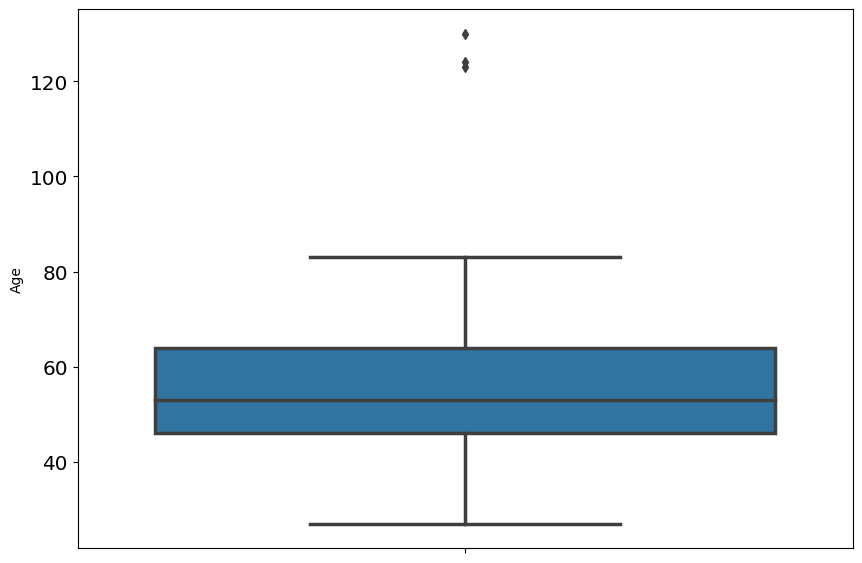

In [ ]:
sns.boxplot(y=df['Age'],orient='v')

In [ ]:
print(f'Number of rows before filtering outliers: {len(df)}')

filtered_entries = np.array([True] * len(df['Age']))

zscore = abs(stats.zscore(df['Age'])) # absolute z-score
filtered_entries = (zscore < 3) & filtered_entries # keep absolute z-score < 3

df = df[filtered_entries] # filtering

print(f'Number of rows after filtering outliers: {len(df)}')

Number of rows before filtering outliers: 2240
Number of rows after filtering outliers: 2237


In [ ]:
df['Age'].describe()

count    2237.000000
mean       54.098346
std        11.701917
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Age, dtype: float64

### Grouping Customer Age
(age range : 27 - 83)

"Adulthood is usually divided into several periods: young or early adulthood (approximately aged 20–39), middle adulthood (40–59), and old age (60+)." ([source](https://www.sciencedirect.com/topics/computer-science/chronological-age))

In [ ]:
df['Age_Group'] = df['Age'].apply(lambda x : 'Early Adulthood' if x < 40 else ('Middle Adulthood' if x < 60 else ('Old Age')))

<ipython-input-26-aee2a3f9da63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = df['Age'].apply(lambda x : 'Early Adulthood' if x < 40 else ('Middle Adulthood' if x < 60 else ('Old Age')))


In [ ]:
df.head()

,Unnamed: 0,ID,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,Age,Total_Children,is_parent,Total_Accepted_Campaign,Total_Purchases,Total_Amount,Days_Joined,Year_Joined,Conversion_Rate,Age_Group
0,0,5524,S1,Lajang,58138000.0,58,635000,88000,546000,172000,...,66,0,0,0,25,1617000,4123,11,0.1429,Old Age
1,1,2174,S1,Lajang,46344000.0,38,11000,1000,6000,2000,...,69,2,1,0,6,27000,3277,9,0.0000,Old Age
2,2,4141,S1,Bertunangan,71613000.0,26,426000,49000,127000,111000,...,58,0,0,0,21,776000,3624,10,0.0000,Middle Adulthood
3,3,6182,S1,Bertunangan,26646000.0,26,11000,4000,20000,10000,...,39,1,1,0,8,53000,3217,9,0.0000,Early Adulthood
4,4,5324,S3,Menikah,58293000.0,94,173000,43000,118000,46000,...,42,1,1,0,19,422000,3473,10,0.0000,Middle Adulthood


## Exploratory Data Analaysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2237 non-null   int64  
 1   ID                       2237 non-null   int64  
 2   Education                2237 non-null   object 
 3   Marital_Status           2237 non-null   object 
 4   Income                   2213 non-null   float64
 5   Recency                  2237 non-null   int64  
 6   MntCoke                  2237 non-null   int64  
 7   MntFruits                2237 non-null   int64  
 8   MntMeatProducts          2237 non-null   int64  
 9   MntFishProducts          2237 non-null   int64  
 10  MntSweetProducts         2237 non-null   int64  
 11  MntGoldProds             2237 non-null   int64  
 12  NumDealsPurchases        2237 non-null   int64  
 13  NumWebPurchases          2237 non-null   int64  
 14  NumCatalogPurchases     

In [ ]:
cats = []
nums = []
dates = []

numeric = ['int64', 'int32', 'float64']

for i in df.columns:
    data_type = str(df[i].dtype)
    if data_type == 'object' :
        cats.append(i)
    elif data_type in numeric :
        nums.append(i)
    else:
        dates.append(i)

Text(0.5, 1.0, 'Correlation plot between numerical features')

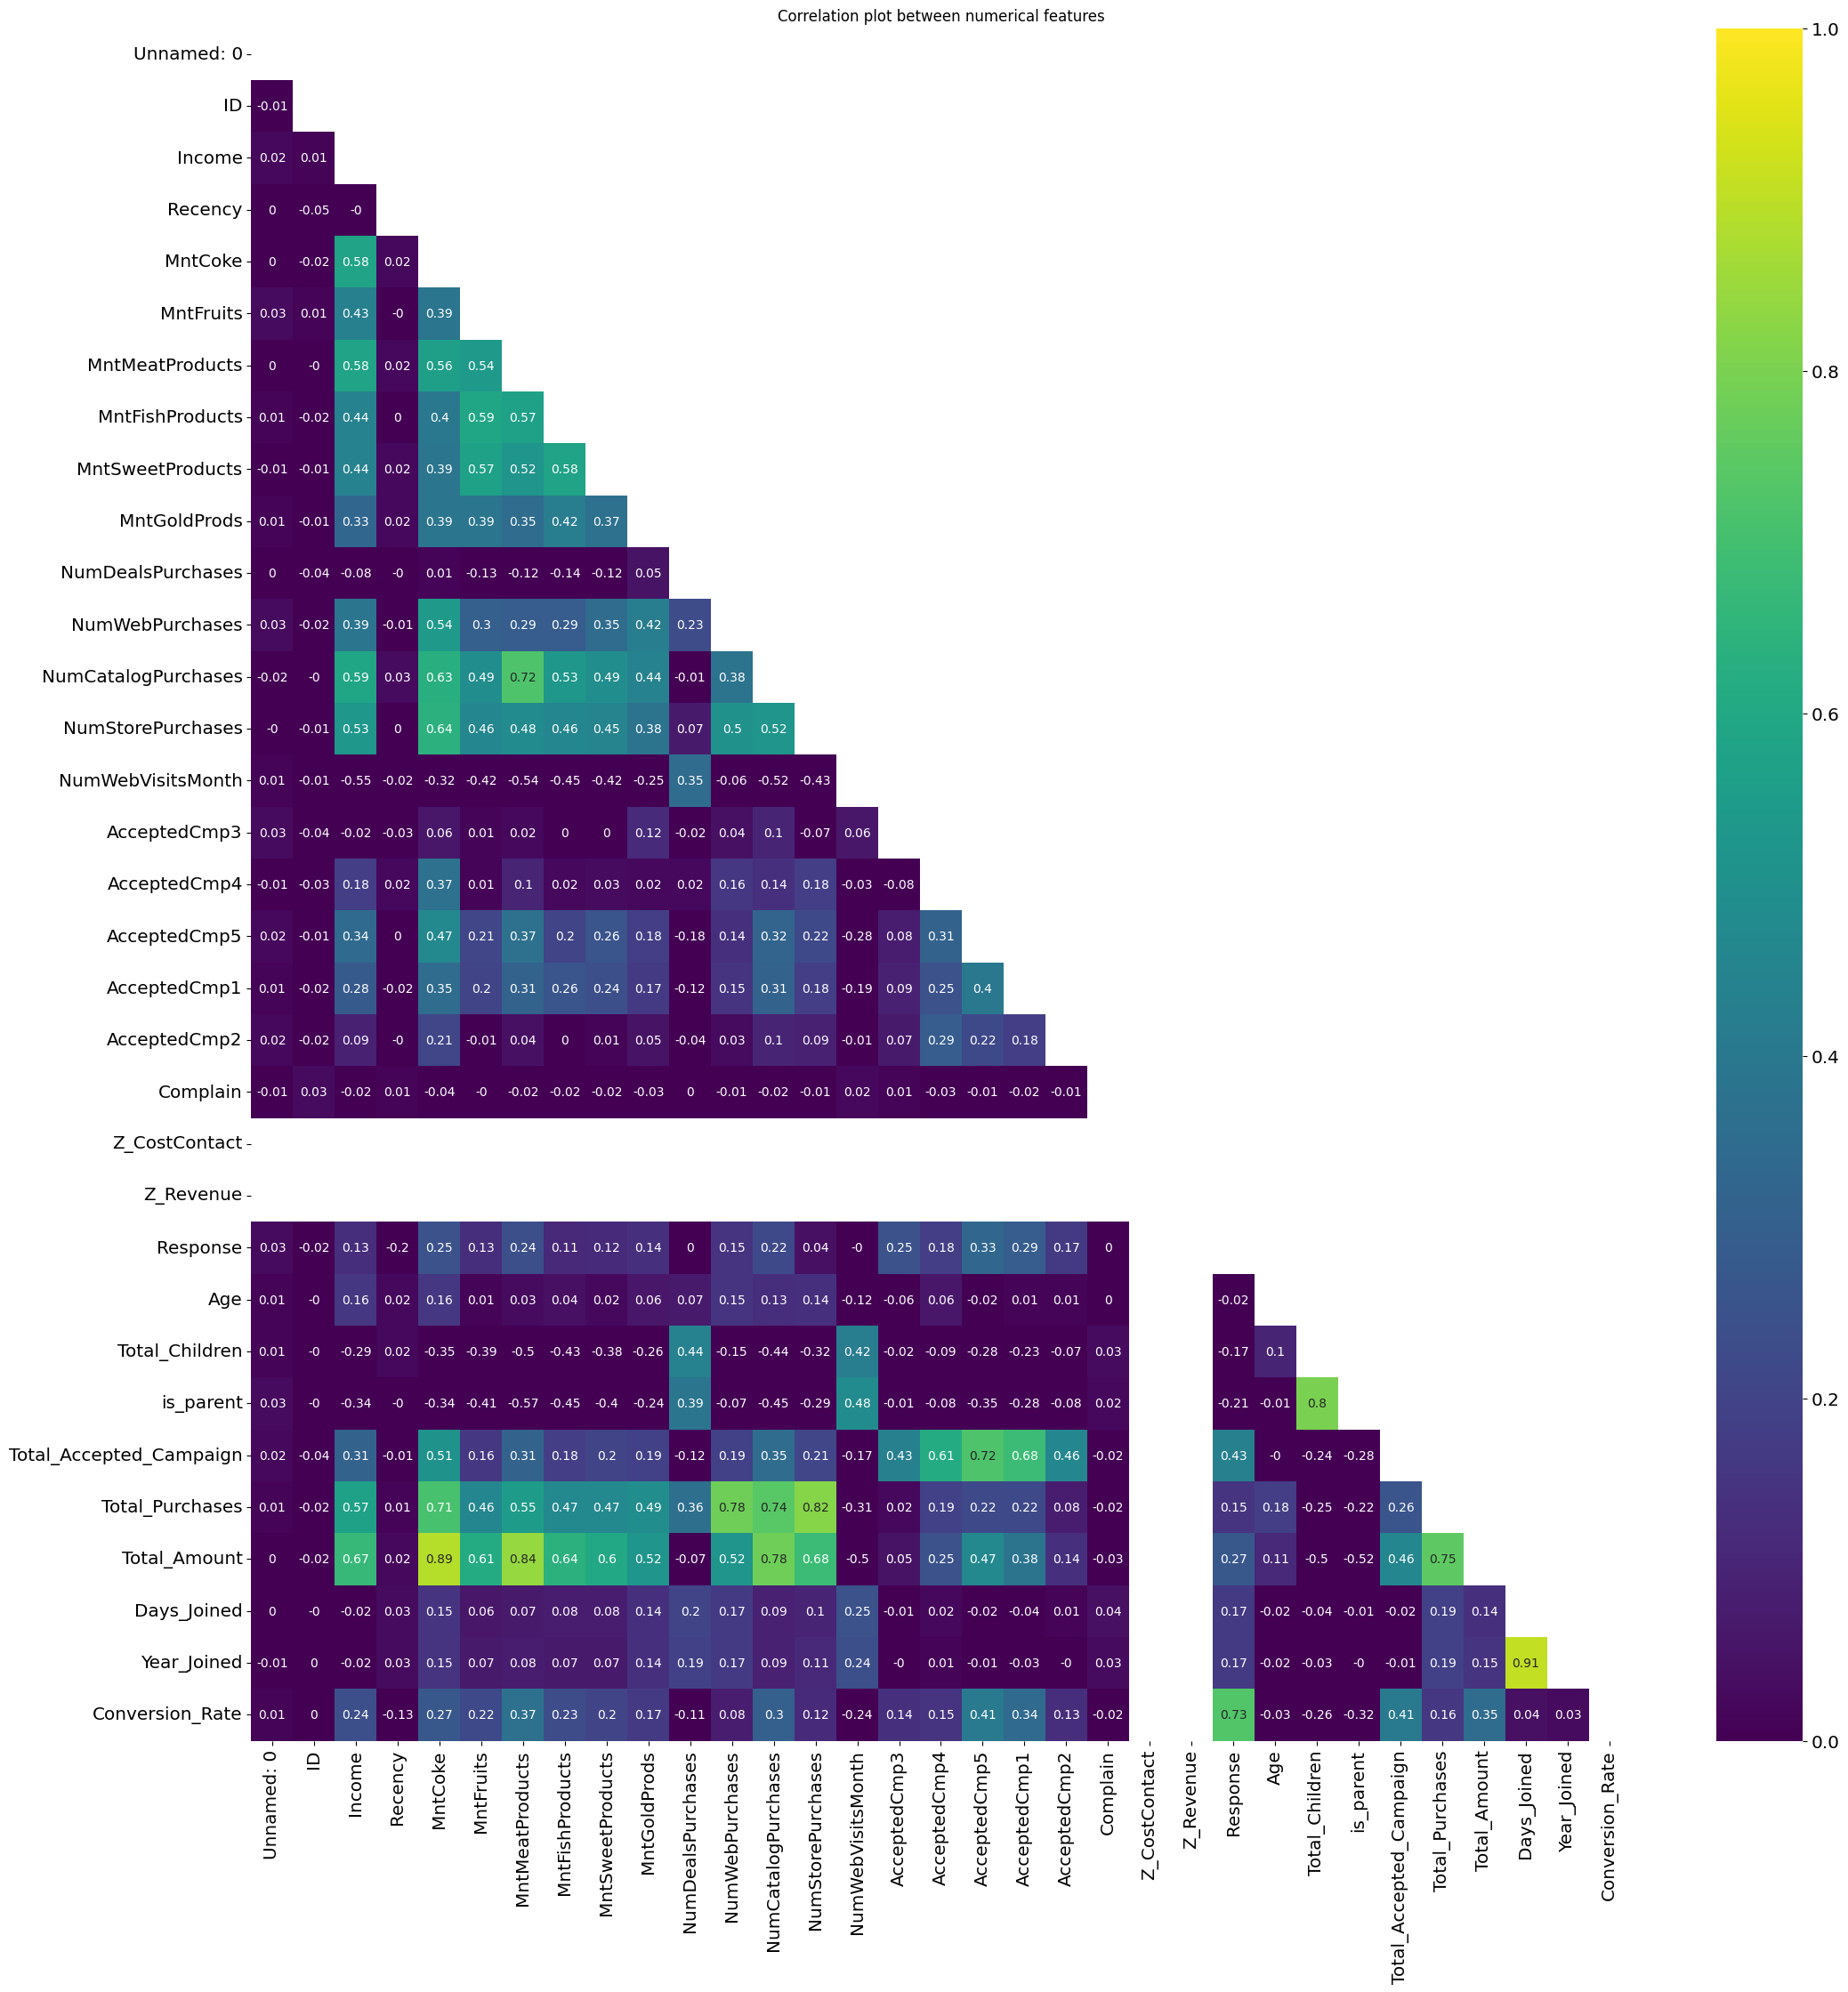

In [ ]:
plt.figure(figsize=(25, 25))
mask = np.triu(np.ones_like(df[nums].corr()))
dataplot = sns.heatmap(df[nums].corr().round(2), cmap="viridis", annot=True, mask=mask, vmin=0, vmax=1)
plt.title('Correlation plot between numerical features')

### Conversion Rate x Age

<Axes: xlabel='Age', ylabel='Conversion_Rate'>

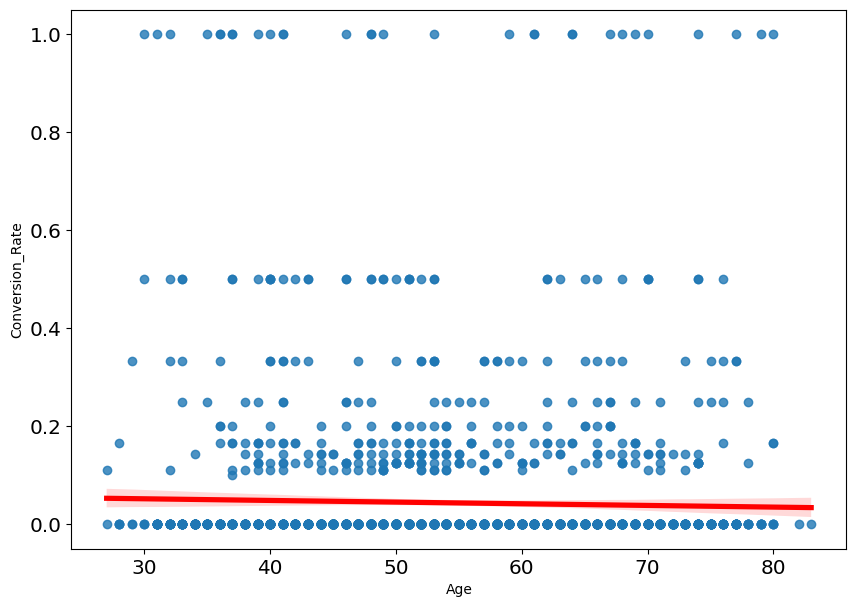

In [ ]:
sns.regplot(x = df['Age'], y = df['Conversion_Rate'],line_kws = {'color':'red'})
#plt.title('Age vs. Conversion Rate')

### Conversion Rate x Age Group

<Axes: xlabel='Age_Group', ylabel='Conversion_Rate'>

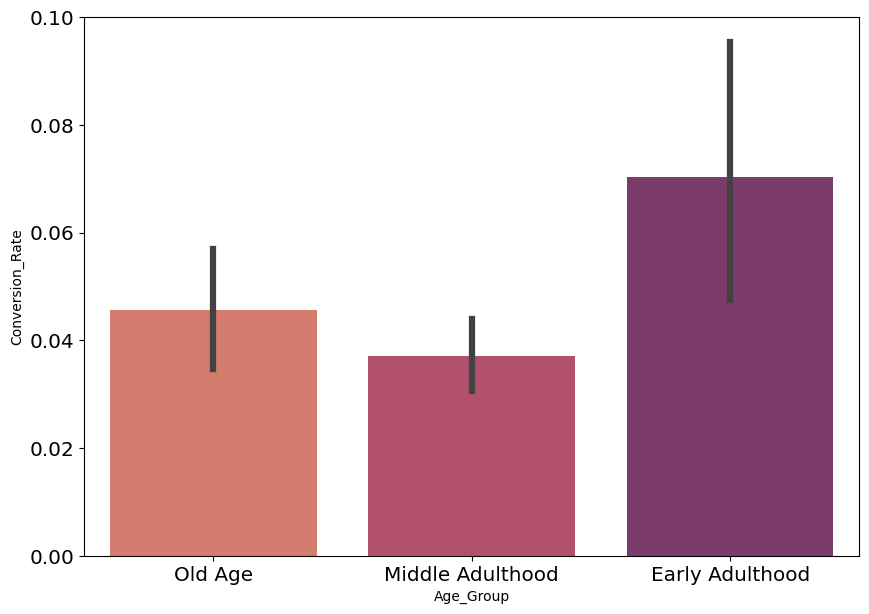

In [ ]:
sns.barplot(x = df['Age_Group'], y = df['Conversion_Rate'], palette = 'flare')
#plt.title('Age_group vs. Conversion Rate')

### Conversion Rate x Spending

<Axes: xlabel='Total_Amount', ylabel='Conversion_Rate'>

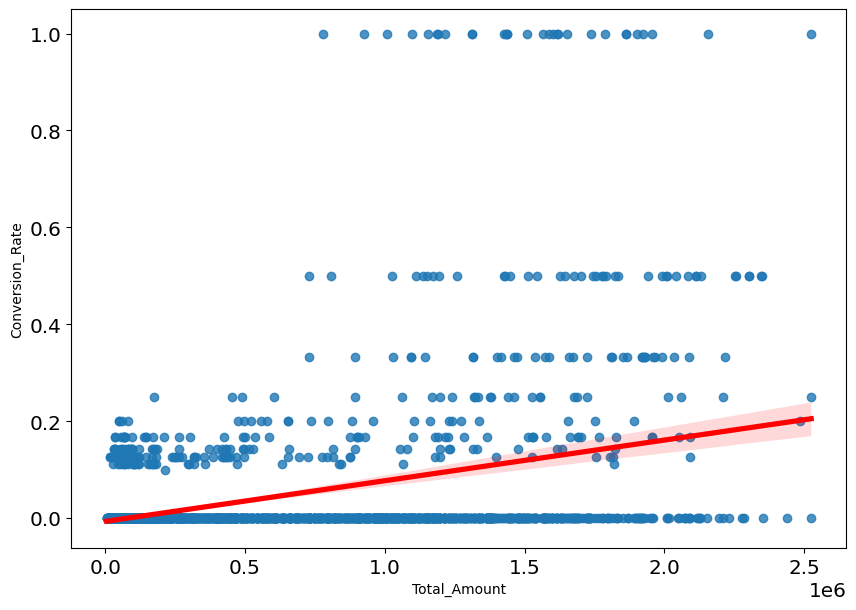

In [ ]:
sns.regplot(x = df['Total_Amount'], y = df['Conversion_Rate'],line_kws = {'color':'red'})
#plt.title('Spending vs. Conversion Rate')

### Conversion Rate x Web Visit

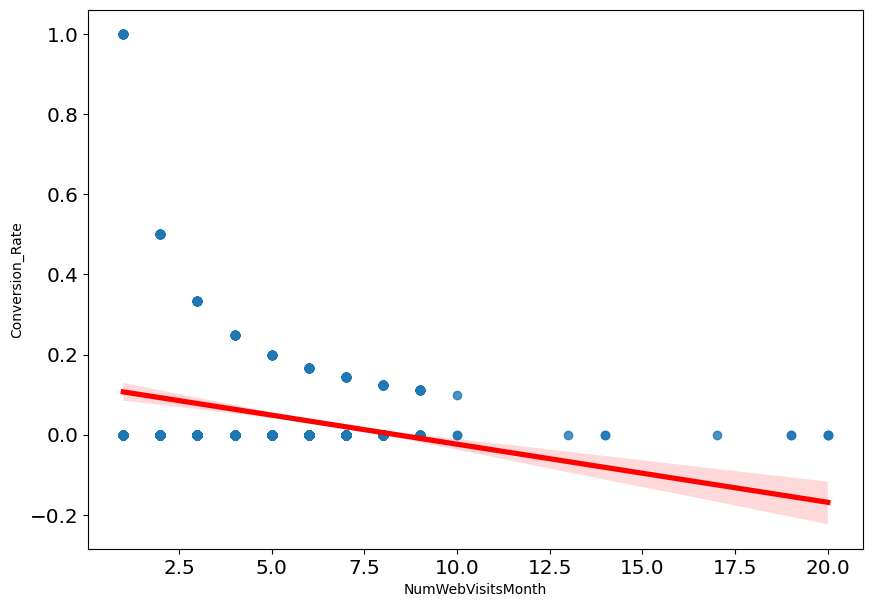

In [ ]:
visit_vs_conversion = sns.regplot(x = df['NumWebVisitsMonth'], y = df['Conversion_Rate'],line_kws = {'color':'red'})
#plt.title('Visit vs. Conversion Rate')

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<Axes: xlabel='NumWebVisitsMonth', ylabel='Conversion_Rate'>

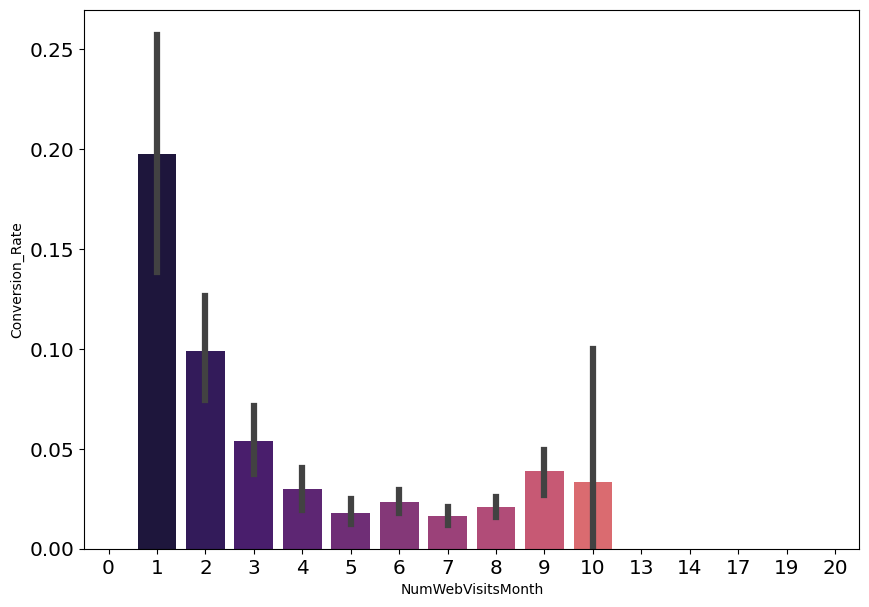

In [ ]:
sns.barplot(x = df['NumWebVisitsMonth'], y = df['Conversion_Rate'],palette = 'magma')

### Conversion Rate x Transaction

<Axes: xlabel='Total_Purchases', ylabel='Conversion_Rate'>

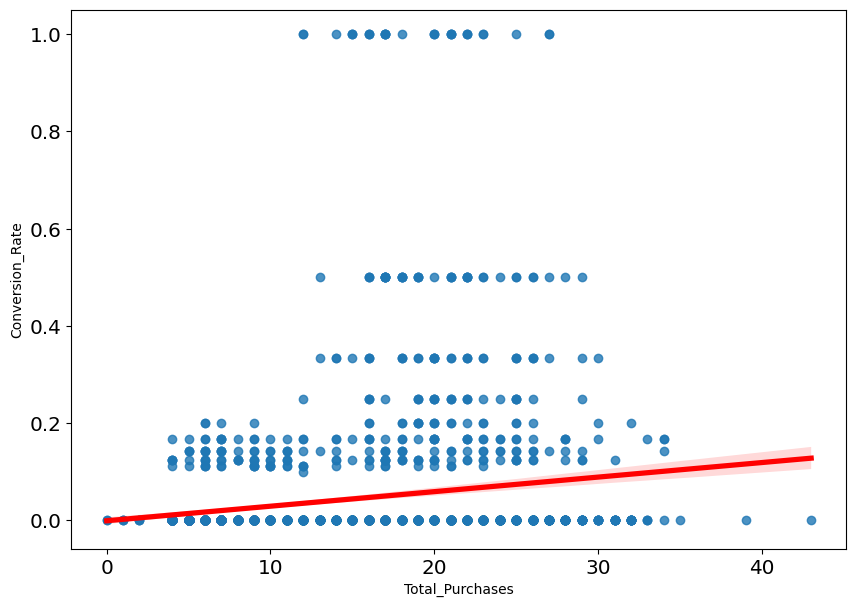

In [ ]:
sns.regplot(x = df['Total_Purchases'], y = df['Conversion_Rate'],line_kws = {'color':'red'})
#plt.title('Transaction vs. Convertion Rate')

### Conversion Rate x Campaign

<Axes: xlabel='Total_Accepted_Campaign', ylabel='Conversion_Rate'>

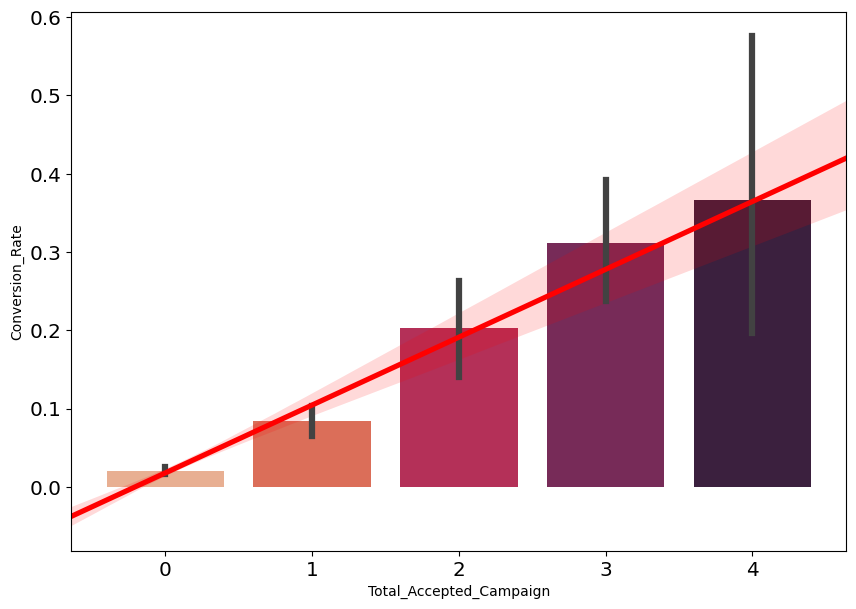

In [ ]:
sns.barplot(x = df['Total_Accepted_Campaign'], y = df['Conversion_Rate'], palette='rocket_r')
sns.regplot(x=df['Total_Accepted_Campaign'],y = df['Conversion_Rate'],line_kws ={'color':'red'},
            data=df, scatter=False, truncate=False)
#plt.title('Campaign vs. Conversion Rate')

### Conversion Rate x Income

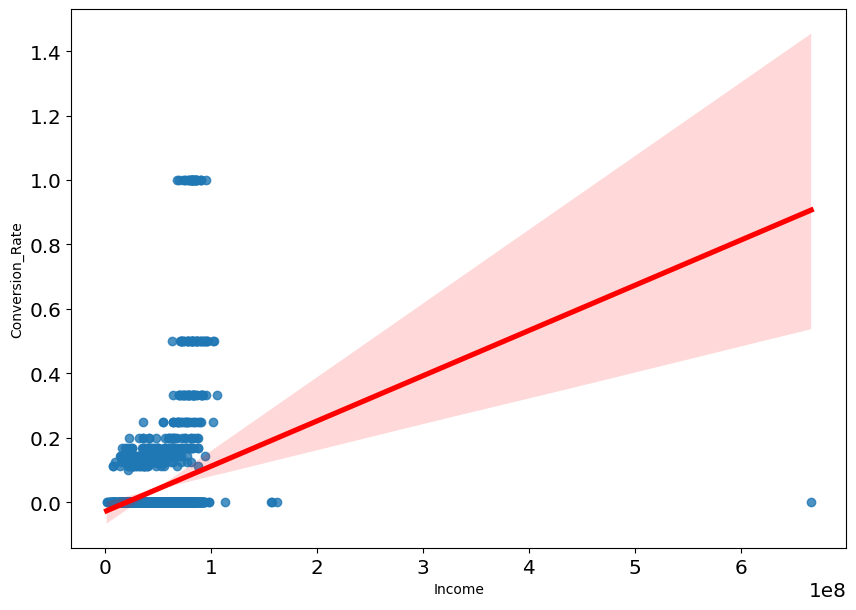

In [ ]:
plot = sns.regplot(x = df['Income'], y = df['Conversion_Rate'],line_kws = {'color':'red'})
#plt.title('Income vs. Conversion Rate')

### Web Visit x Transaction

<Axes: xlabel='NumWebVisitsMonth', ylabel='Total_Purchases'>

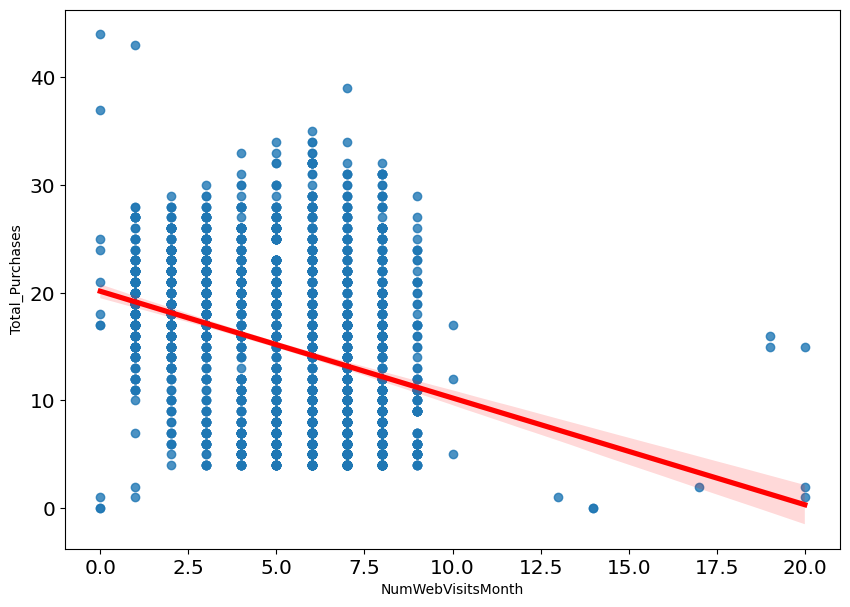

In [ ]:
sns.regplot(x = df['NumWebVisitsMonth'], y = df['Total_Purchases'],line_kws = {'color':'red'})
#plt.title('Visit vs. Transaction')

### Age Group x Campaign

<Axes: xlabel='Age_Group', ylabel='Total_Accepted_Campaign'>

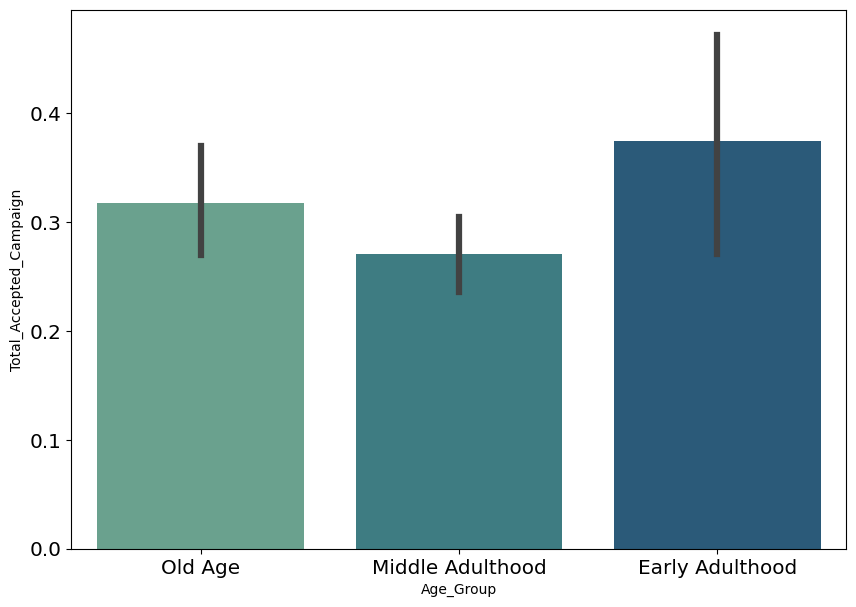

In [ ]:
sns.barplot(x = df['Age_Group'], y = df['Total_Accepted_Campaign'], palette='crest')
#plt.title('Age_group vs. Campaign')

### Income x Spending

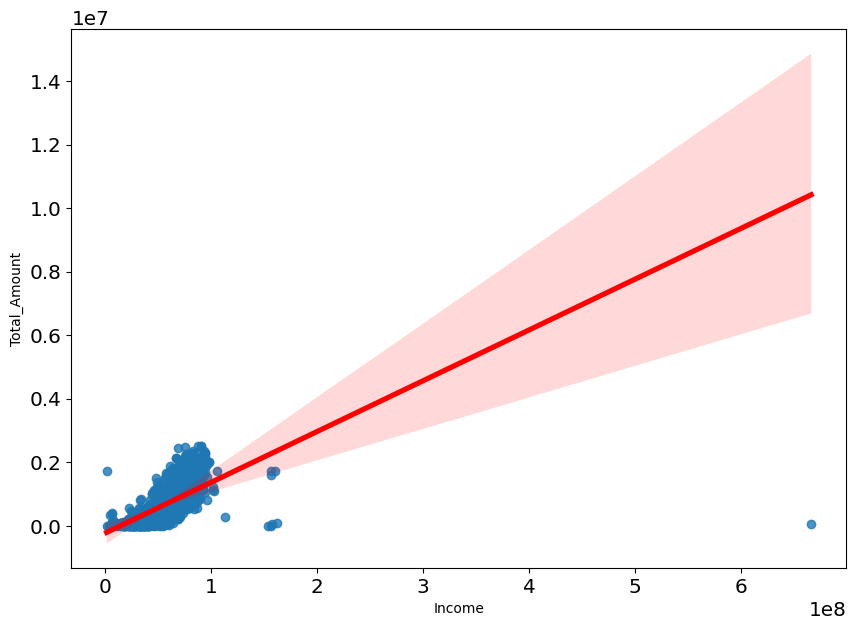

In [ ]:
plot = sns.regplot(x = df['Income'], y = df['Total_Amount'],line_kws = {'color':'red'})

### Income x Total_Purchases

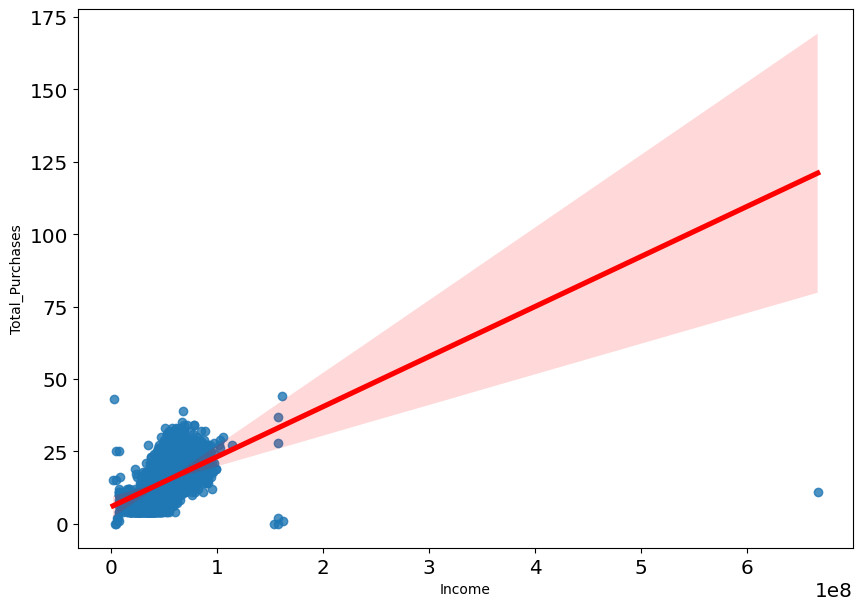

In [ ]:
plot = sns.regplot(x = df['Income'], y = df['Total_Purchases'],line_kws = {'color':'red'})

### Income x Age

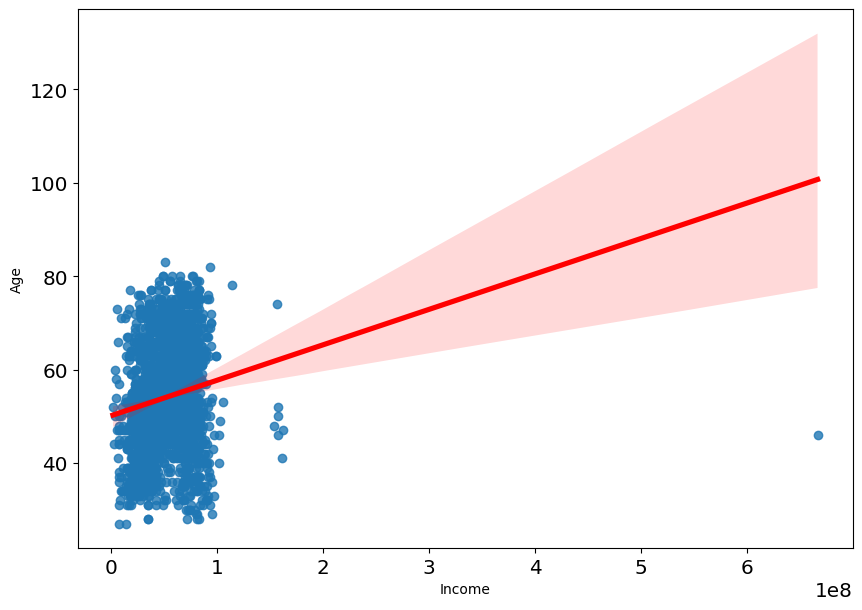

In [ ]:
plot = sns.regplot(x = df['Income'], y = df['Age'],line_kws = {'color':'red'})

### Age x Spending

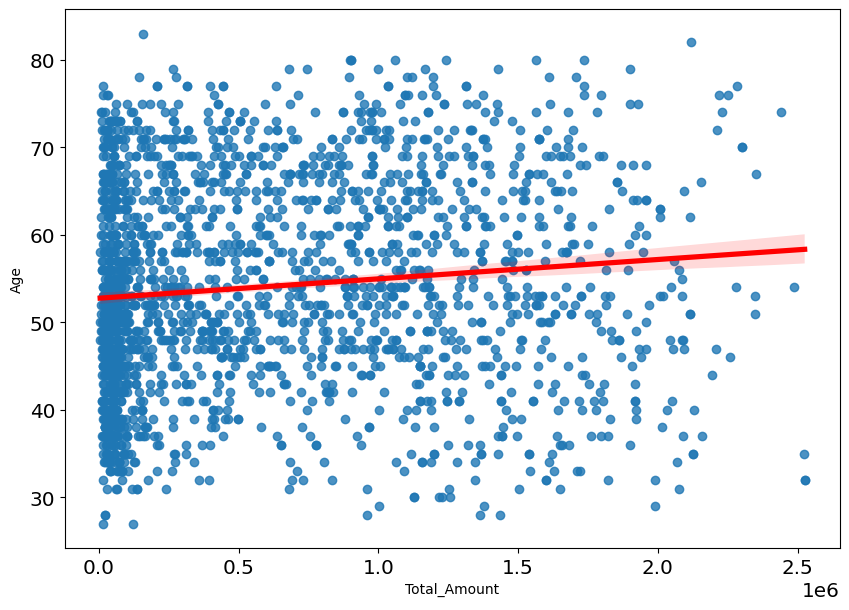

In [ ]:
plot = sns.regplot(x = df['Total_Amount'], y = df['Age'],line_kws = {'color':'red'})

# Data Cleaning & Preprocessing *

In [ ]:
df1 = df.copy()

## Handling Missing Value

In [ ]:
df1.isnull().sum()

Unnamed: 0                  0
ID                          0
Education                   0
Marital_Status              0
Income                     24
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
Age                         0
Total_Children              0
is_parent                   0
Total_Accepted_Campaign     0
Total_Purchases             0
Total_Amount                0
Days_Joined                 0
Year_Joine

In [ ]:
# replace missing value with "Median"
df1['Conversion_Rate'] = df1['Conversion_Rate'].fillna(df1['Conversion_Rate'].median())
df1['Income'] = df['Income'].fillna(df1['Income'].median()) # menggunakan median karena data skewed

df1.isnull().sum()

Unnamed: 0                 0
ID                         0
Education                  0
Marital_Status             0
Income                     0
Recency                    0
MntCoke                    0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Total_Children             0
is_parent                  0
Total_Accepted_Campaign    0
Total_Purchases            0
Total_Amount               0
Days_Joined                0
Year_Joined                0
Conversion_Rat

## Handling Duplicated Data

In [ ]:
# data duplicated check
print('Duplicated Data :', df1.duplicated().sum())

Duplicated Data : 0


## Feature Selection *

In [ ]:
df2 = df1.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2237 non-null   int64  
 1   ID                       2237 non-null   int64  
 2   Education                2237 non-null   object 
 3   Marital_Status           2237 non-null   object 
 4   Income                   2237 non-null   float64
 5   Recency                  2237 non-null   int64  
 6   MntCoke                  2237 non-null   int64  
 7   MntFruits                2237 non-null   int64  
 8   MntMeatProducts          2237 non-null   int64  
 9   MntFishProducts          2237 non-null   int64  
 10  MntSweetProducts         2237 non-null   int64  
 11  MntGoldProds             2237 non-null   int64  
 12  NumDealsPurchases        2237 non-null   int64  
 13  NumWebPurchases          2237 non-null   int64  
 14  NumCatalogPurchases     

In [ ]:
# drop unnecessary data
acc_col = [col for col in df.columns if 'AcceptedCmp' in col]

df2.drop(columns = acc_col, inplace=True)
df2.drop(columns = ['ID',
                    'Unnamed: 0',
                    'Z_CostContact',
                    'Z_Revenue'
                   ], inplace=True)

## Feature Encoding *

In [ ]:
df3 = df2.copy()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2237 non-null   object 
 1   Marital_Status           2237 non-null   object 
 2   Income                   2237 non-null   float64
 3   Recency                  2237 non-null   int64  
 4   MntCoke                  2237 non-null   int64  
 5   MntFruits                2237 non-null   int64  
 6   MntMeatProducts          2237 non-null   int64  
 7   MntFishProducts          2237 non-null   int64  
 8   MntSweetProducts         2237 non-null   int64  
 9   MntGoldProds             2237 non-null   int64  
 10  NumDealsPurchases        2237 non-null   int64  
 11  NumWebPurchases          2237 non-null   int64  
 12  NumCatalogPurchases      2237 non-null   int64  
 13  NumStorePurchases        2237 non-null   int64  
 14  NumWebVisitsMonth       

In [ ]:
cat = df3.select_dtypes(include='O').columns
num = df3.select_dtypes(exclude='O').columns

In [ ]:
cat

Index(['Education', 'Marital_Status', 'Age_Group'], dtype='object')

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencod = LabelEncoder()

df3['Age_Group'] = labelencod.fit_transform(df3['Age_Group'])
df3['Education'] = labelencod.fit_transform(df3['Education'])

### One-Hot Encoding

In [ ]:
df3 = pd.get_dummies(df3, columns=['Marital_Status'])

## Feature Transformation *

In [ ]:
df4 = df3.copy()

In [ ]:
num

Index(['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Total_Children', 'is_parent', 'Total_Accepted_Campaign',
       'Total_Purchases', 'Total_Amount', 'Days_Joined', 'Year_Joined',
       'Conversion_Rate'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# standardization some columns
std = [ 'Income','Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
        'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Children',
        'Total_Accepted_Campaign', 'Total_Purchases', 'Total_Amount',
        'Days_Joined', 'Year_Joined', 'Conversion_Rate']

for r in std:
  df4[r] = StandardScaler().fit_transform(df4[r].values.reshape(len(df4), 1))

In [ ]:
df4

,Education,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Days_Joined,Year_Joined,Conversion_Rate,Age_Group,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,1,0.236072,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,0.348371,...,1.975410,1.354948,0.696270,2,0,0,0,0,1,0
1,1,-0.234979,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.169096,...,-1.667521,-1.467230,-0.305014,2,0,0,0,0,1,0
2,1,0.774261,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,-0.686563,...,-0.173317,-0.056141,-0.305014,1,1,0,0,0,0,0
3,1,-1.021713,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.169096,...,-1.925885,-1.467230,-0.305014,0,1,0,0,0,0,0
4,3,0.242262,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,1.383304,...,-0.823533,-0.056141,-0.305014,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,0.359286,-0.107242,1.203582,0.421324,0.066855,0.081954,2.202538,3.901246,-0.169096,...,0.123802,-0.056141,-0.305014,1,0,0,0,0,0,1
2236,3,0.470758,0.238186,0.303134,-0.661606,-0.606872,-0.686886,-0.655663,-0.691139,2.418238,...,-1.943110,-1.467230,-0.305014,2,1,0,0,0,0,0
2237,1,0.189861,1.447184,1.794966,0.547246,0.221989,-0.101103,-0.364998,-0.383699,-0.686563,...,-0.849369,-1.467230,-0.305014,1,0,1,0,0,0,0
2238,2,0.679683,-1.419868,0.368513,0.093927,0.208692,0.777572,0.070999,0.327256,-0.169096,...,-0.845063,-0.056141,-0.305014,2,1,0,0,0,0,0


# Data Modelling


In [ ]:
df_model = df4.copy()

## Elbow Method K- Mean Clustering

[Link Source 1;](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)
[Link Source 2.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

Building the clustering model and calculating the values of the Distortion and Inertia:

In [ ]:
X = df_model

inertias = []
mapping = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=24)
    kmeanModel.fit(X)

    inertias.append(kmeanModel.inertia_)

    mapping[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Tabulating and Visualizing the Results using the different values of Inertia:

In [ ]:
for key, val in mapping.items():
	print(f'{key} : {val}')

1 : 52495.70809119352
2 : 38568.477108662795
3 : 34795.673297493064
4 : 32853.50878106097
5 : 31361.43811887838
6 : 30359.46406648623
7 : 29420.29016785803
8 : 28716.82181072642
9 : 28037.54251107288


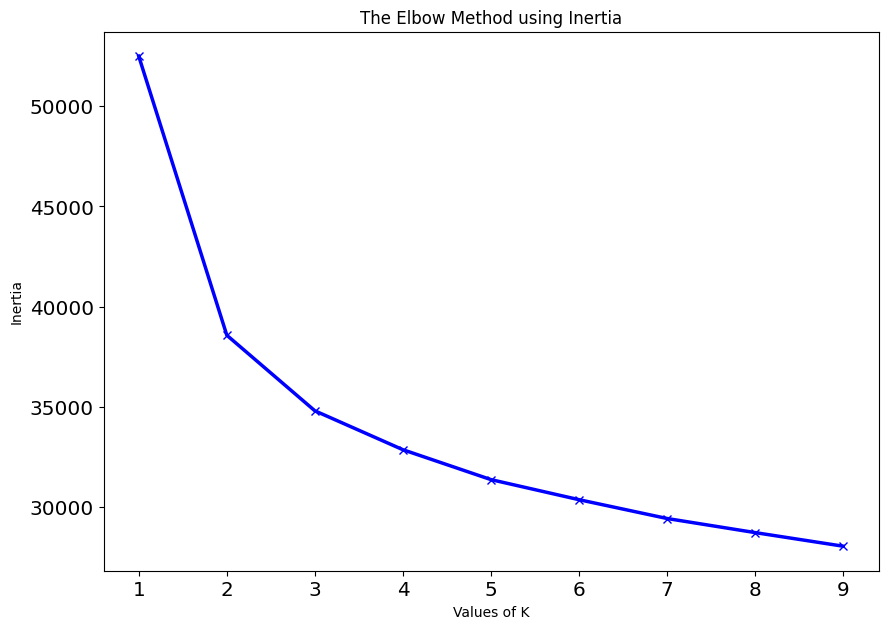

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

> From clusters 1 to 4 the distance between clusters is quite far apart, but from clusters 4 to 5 onwards the distance is quite close and getting closer. It can be said that cluster 4 is an optimal cluster.

## Sillhouette Score Evaluation

[Link Source](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
from sklearn.metrics import silhouette_score

clusters_range = range(2,10)
results = []

for i in clusters_range:
  km = KMeans(n_clusters=i, random_state=24)
  cluster_labels = km.fit_predict(df_model)
  silhouette_avg = silhouette_score(df_model, cluster_labels)
  results.append([i, silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_result = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
result

,n_clusters,silhouette_score
0,2,0.270107
1,3,0.188347
2,4,0.183801
3,5,0.105559
4,6,0.093623
5,7,0.093414
6,8,0.095792
7,9,0.094958


In [ ]:
pivot_result.style.background_gradient(cmap='Reds')

,silhouette_score
n_clusters,
2,0.270107
3,0.188347
4,0.183801
5,0.105559
6,0.093623
7,0.093414
8,0.095792
9,0.094958


> The silhouette score in cluster 5 is quite low compared to the previous cluster, so **using 4 clusters is sufficient**.

## Modelling


In [ ]:
dfx = df2.copy()

In [ ]:
kmeans = KMeans (n_clusters = 4, random_state = 24)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
dfx['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
dfx['cluster'].value_counts().to_frame().reset_index().rename(columns={'index':'cluster','cluster':'total_customers'})

,cluster,total_customers
0,0,1018
1,1,568
2,2,507
3,3,144


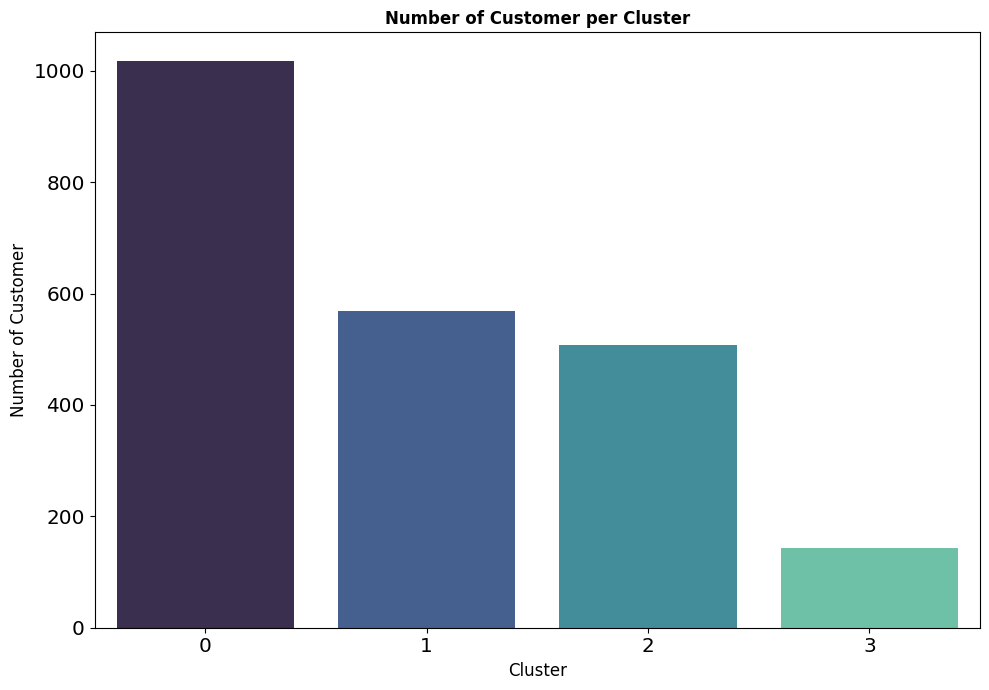

In [ ]:
sns.countplot(x = df_model['cluster'], palette = 'mako')
plt.title('Number of Customer per Cluster', fontweight ='bold')
plt.xlabel('Cluster',fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.tight_layout()

# Customer Personality Analysis
for Marketing Retargeting

Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature yang digunakan

Memilih cluster yang akan dilakukan marketing retargetting

Menghitung potential impact dari hasil marketing retargetting dari cluster yang ada

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2237 non-null   object 
 1   Marital_Status           2237 non-null   object 
 2   Income                   2237 non-null   float64
 3   Recency                  2237 non-null   int64  
 4   MntCoke                  2237 non-null   int64  
 5   MntFruits                2237 non-null   int64  
 6   MntMeatProducts          2237 non-null   int64  
 7   MntFishProducts          2237 non-null   int64  
 8   MntSweetProducts         2237 non-null   int64  
 9   MntGoldProds             2237 non-null   int64  
 10  NumDealsPurchases        2237 non-null   int64  
 11  NumWebPurchases          2237 non-null   int64  
 12  NumCatalogPurchases      2237 non-null   int64  
 13  NumStorePurchases        2237 non-null   int64  
 14  NumWebVisitsMonth       

## Cluster Interpretation

Data for each cluster:

In [ ]:
df_c0 = dfx[(dfx.cluster == 0)]
df_c1 = dfx[(dfx.cluster == 1)]
df_c2 = dfx[(dfx.cluster == 2)]
df_c3 = dfx[(dfx.cluster == 3)]

### Numerical

In [ ]:
dfx.nunique()

Education                     5
Marital_Status                6
Income                     1971
Recency                     100
MntCoke                     775
MntFruits                   158
MntMeatProducts             557
MntFishProducts             182
MntSweetProducts            177
MntGoldProds                213
NumDealsPurchases            15
NumWebPurchases              15
NumCatalogPurchases          14
NumStorePurchases            14
NumWebVisitsMonth            16
Complain                      2
Response                      2
Age                          56
Total_Children                4
is_parent                     2
Total_Accepted_Campaign       5
Total_Purchases              39
Total_Amount               1054
Days_Joined                 663
Year_Joined                   4
Conversion_Rate              11
Age_Group                     3
cluster                       4
dtype: int64

In [ ]:
df_group_cluster = dfx.groupby(['cluster']).agg({ 'Total_Amount': ['count', 'mean', 'median', 'min', 'max'],
                                                  'Total_Purchases':['mean', 'median', 'min', 'max'],
                                                  'Income':['mean', 'median', 'min', 'max'],
                                                  'Age':['mean', 'median', 'min', 'max'],
                                                  'Conversion_Rate':['mean', 'median', 'min', 'max']}
                                                ).reset_index()
df_group_cluster.columns = ['cluster','total_customers',
                            'mean_spent','median_spent','min_spent','max_spent',
                            'mean_transaction','median_transaction','min_transaction','max_transaction',
                            'mean_income','median_income','min_income','max_income',
                            'mean_age','median_age','min_age','max_age',
                            'mean_cvr_%', 'median_cvr_%', 'min_cvr_%', 'max_cvr_%',
                            ]
spent = df_group_cluster[['mean_spent','median_spent','min_spent','max_spent']]
transaction = df_group_cluster[['mean_transaction','median_transaction','min_transaction','max_transaction']]
income = df_group_cluster[['mean_income','median_income','min_income','max_income']]
age = df_group_cluster[['mean_age','median_age','min_age','max_age']]
cvr = df_group_cluster[['mean_cvr_%', 'median_cvr_%', 'min_cvr_%', 'max_cvr_%']]*100
#df_group_cluster.sort_values('cluster', ascending = True).T

In [ ]:
spent.round(0).T

,0,1,2,3
mean_spent,93003.0,686634.0,1247641.0,1651451.0
median_spent,63000.0,604000.0,1193000.0,1682500.0
min_spent,5000.0,199000.0,62000.0,523000.0
max_spent,442000.0,1829000.0,2525000.0,2525000.0


In [ ]:
transaction.round(0).T

,0,1,2,3
mean_transaction,8.0,21.0,21.0,21.0
median_transaction,7.0,20.0,21.0,20.0
min_transaction,0.0,10.0,1.0,12.0
max_transaction,17.0,39.0,44.0,32.0


In [ ]:
income.round(0).T

,0,1,2,3
mean_income,35214079.0,55856239.0,73924454.0,81795368.0
median_income,34566000.0,56546500.0,72504000.0,82365500.0
min_income,1730000.0,4428000.0,2447000.0,48192000.0
max_income,162397000.0,94871000.0,666666000.0,105471000.0


In [ ]:
age.round(0).T

,0,1,2,3
mean_age,52.0,58.0,56.0,52.0
median_age,50.0,58.0,55.0,50.0
min_age,27.0,31.0,28.0,28.0
max_age,83.0,80.0,82.0,80.0


In [ ]:
cvr.round(1).T

,0,1,2,3
mean_cvr_%,1.2,2.0,1.6,46.0
median_cvr_%,0.0,0.0,0.0,33.3
min_cvr_%,0.0,0.0,0.0,0.0
max_cvr_%,25.0,25.0,33.3,100.0


* **Cluster 0**

**Age**: 27 - 83 (mean : 52) (median : 50)

**Income**: 1.730.000 - 162.397.000 (mean : 35.256.810) (median : 34.587.000)

**Spending** : 5.000	- 442.000 (mean : 93.553) (median : 63.000)

**Conversion Rate**: 0 - 0,25 (mean : 0,01) (median : 0)

* **Cluster 1**

**Age**: 28 - 82 (mean : 56) (median : 55)

**Income**: 2.447.000 - 666.666.000 (mean : 73.947.680) (median : 72.504.000)

**Spending** : 62.000	- 2.525.000 (mean : 1.247.473) (median : 1.193.000)

**Conversion Rate** : 0 - 0,33 (mean : 0,02) (median : 0)

* **Cluster 2**

**Age**: 31 - 80 (mean : 58) (median : 58)

**Income**: 4.428.000 - 94.871.000 (mean : 55.867.771) (median : 56.559.000)

**Spending** : 199.000	- 1.829.000 (mean : 688.941) (median : 606.000)

**Conversion Rate** : 0 - 0,25 (mean : 0,02) (median : 0)

* **Cluster 3**

**Age**: 28 - 80 (mean : 52) (median : 58)

**Income**: 48.192.000 - 105.471.000 (mean : 81.795.368) (median : 82.365.500)

**Spending** : 523.000 -	2.525.000 (mean : 1.651.451) (median : 1.682.500)

**Conversion Rate** : 0 - 1 (mean : 0,46) (median : 0.33)






### Categorical

In [ ]:
#cat_cols = dfx.select_dtypes(include='O').columns
cat_cols = ['Education', 'Marital_Status', 'Age_Group', 'is_parent', 'Total_Children']
num_cols = dfx.drop(columns=cat_cols)
cat_cols

['Education', 'Marital_Status', 'Age_Group', 'is_parent', 'Total_Children']

In [ ]:
for col in cat_cols:
  i = 0
  print(f'Value counts of column {col}, cluster {i}')
  print(df_c0[col].value_counts())
  i = i + 1
  print(f'Value counts of column {col}, cluster {i}')
  print(df_c1[col].value_counts())
  i = i + 1
  print(f'Value counts of column {col}, cluster {i}')
  print(df_c2[col].value_counts())
  i = i + 1
  print(f'Value counts of column {col}, cluster {i}')
  print(df_c3[col].value_counts())
  print('---'*25, '\n')

Value counts of column Education, cluster 0
S1     497
S3     189
S2     170
D3     110
SMA     52
Name: Education, dtype: int64
Value counts of column Education, cluster 1
S1     266
S3     163
S2     106
D3      32
SMA      1
Name: Education, dtype: int64
Value counts of column Education, cluster 2
S1     289
S3      97
S2      69
D3      51
SMA      1
Name: Education, dtype: int64
Value counts of column Education, cluster 3
S1    75
S3    36
S2    25
D3     8
Name: Education, dtype: int64
--------------------------------------------------------------------------- 

Value counts of column Marital_Status, cluster 0
Menikah        400
Bertunangan    261
Lajang         230
Cerai           99
Janda           26
Duda             2
Name: Marital_Status, dtype: int64
Value counts of column Marital_Status, cluster 1
Menikah        221
Bertunangan    154
Lajang         104
Cerai           65
Janda           23
Duda             1
Name: Marital_Status, dtype: int64
Value counts of column Marita

"Adulthood is usually divided into several periods: young or early adulthood (approximately aged 20–39), middle adulthood (40–59), and old age (60+).

- **Cluster 0**

The highest level of education in this cluster is S1. Most are married. Most ages are between 40-59 (middle adulthood). Dominated by those who already have children, the most are those who have 1 child.

- **Cluster 1**

Dominated by people who have at least S1 education. the majority of this group are married or engaged. Most ages are in the middle age and old age group. Most are married but not yet parents.

- **Cluster 2**

Most of them have studied S1. the majority of this group are also married or engaged. Most ages are in the middle age and old age group. Very dominated by those who are already parents who already have at least 1 child.

- **Cluster 3**

Most have an undergraduate degree, but not a few have masters and doctoral degrees. Dominated by single and married people. The number of each age group is not much different. the majority are those who are not married and do not have children.

## Cluster Analysis

In [ ]:
dfx.nunique()

Education                     5
Marital_Status                6
Income                     1971
Recency                     100
MntCoke                     775
MntFruits                   158
MntMeatProducts             557
MntFishProducts             182
MntSweetProducts            177
MntGoldProds                213
NumDealsPurchases            15
NumWebPurchases              15
NumCatalogPurchases          14
NumStorePurchases            14
NumWebVisitsMonth            16
Complain                      2
Response                      2
Age                          56
Total_Children                4
is_parent                     2
Total_Accepted_Campaign       5
Total_Purchases              39
Total_Amount               1054
Days_Joined                 663
Year_Joined                   4
Conversion_Rate              11
Age_Group                     3
cluster                       4
dtype: int64

### Total Accepted Campaign per Cluster

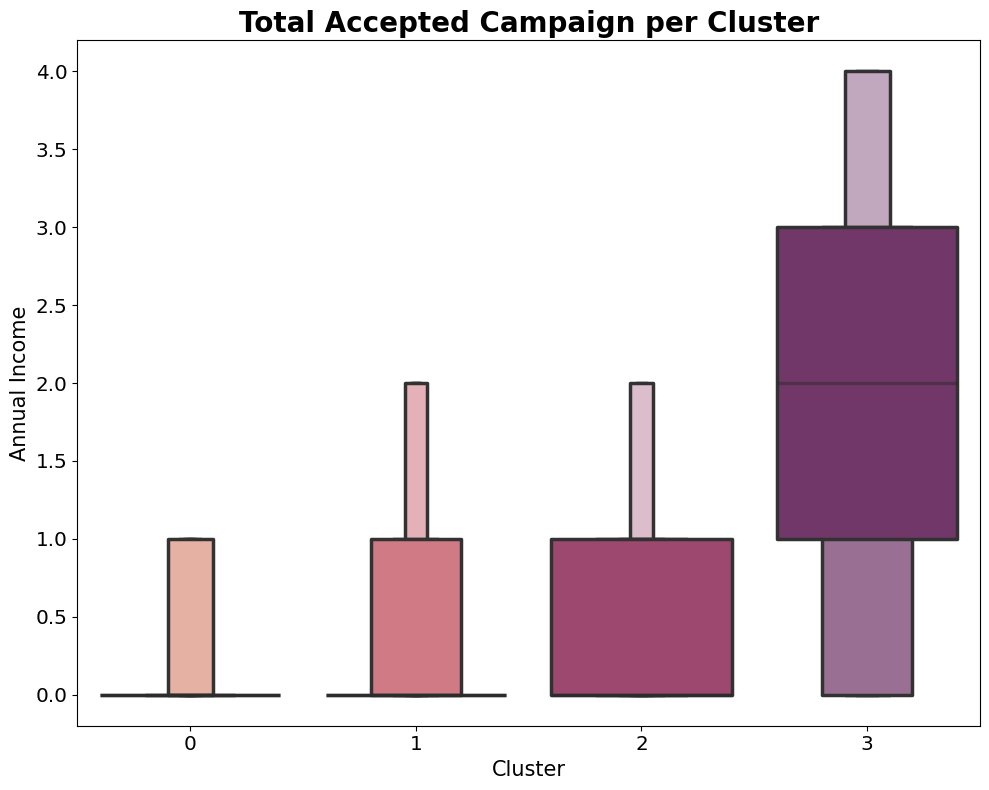

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=dfx['cluster'], y=dfx['Total_Accepted_Campaign'], palette='flare',  showfliers=False)

plt.title('Total Accepted Campaign per Cluster', fontsize=20, fontweight='bold')
plt.ylabel('Annual Income', fontsize=15)
plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()

### Total Transaction per Cluster

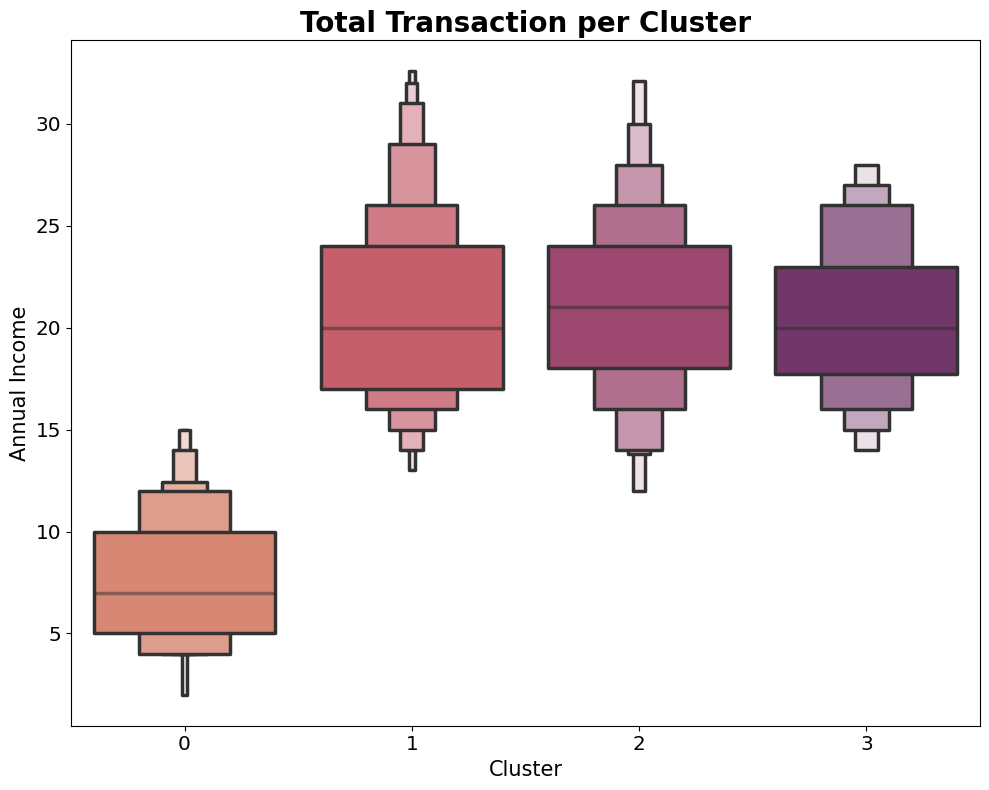

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=dfx['cluster'], y=dfx['Total_Purchases'], palette='flare',  showfliers=False)

plt.title('Total Transaction per Cluster', fontsize=20, fontweight='bold')
plt.ylabel('Annual Income', fontsize=15)
plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()

### Total Income per Cluster

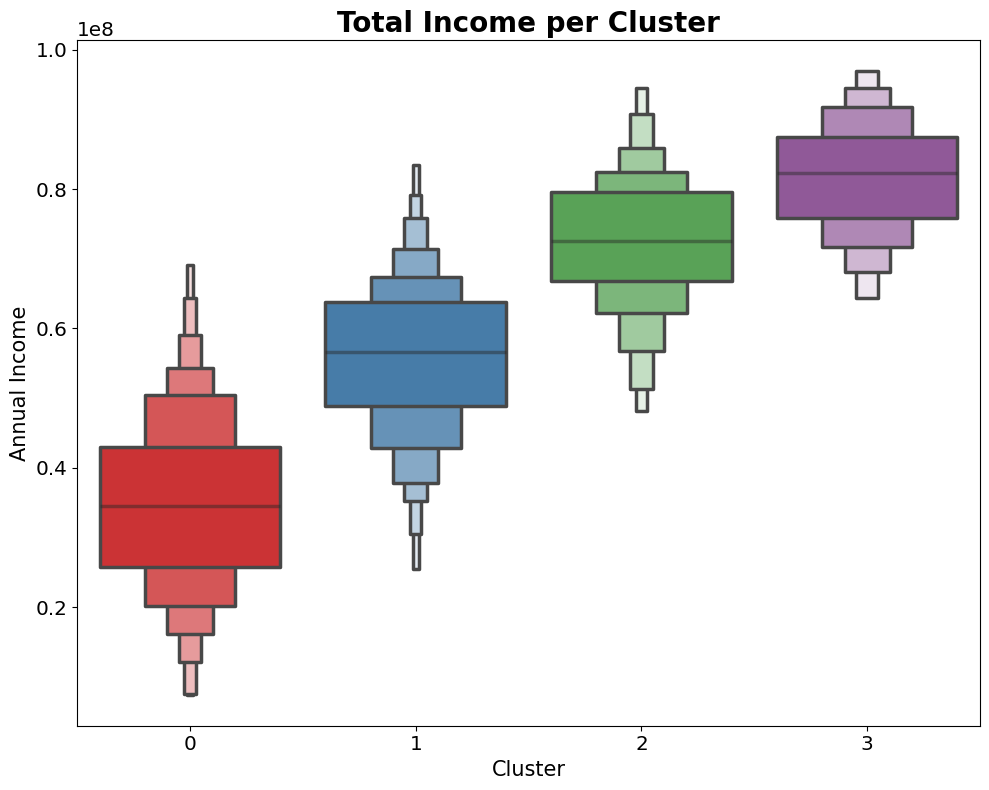

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=dfx['cluster'], y=dfx['Income'], palette='Set1',  showfliers=False)

plt.title('Total Income per Cluster', fontsize=20, fontweight='bold')
plt.ylabel('Annual Income', fontsize=15)
plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()

### Total Spending per Cluster

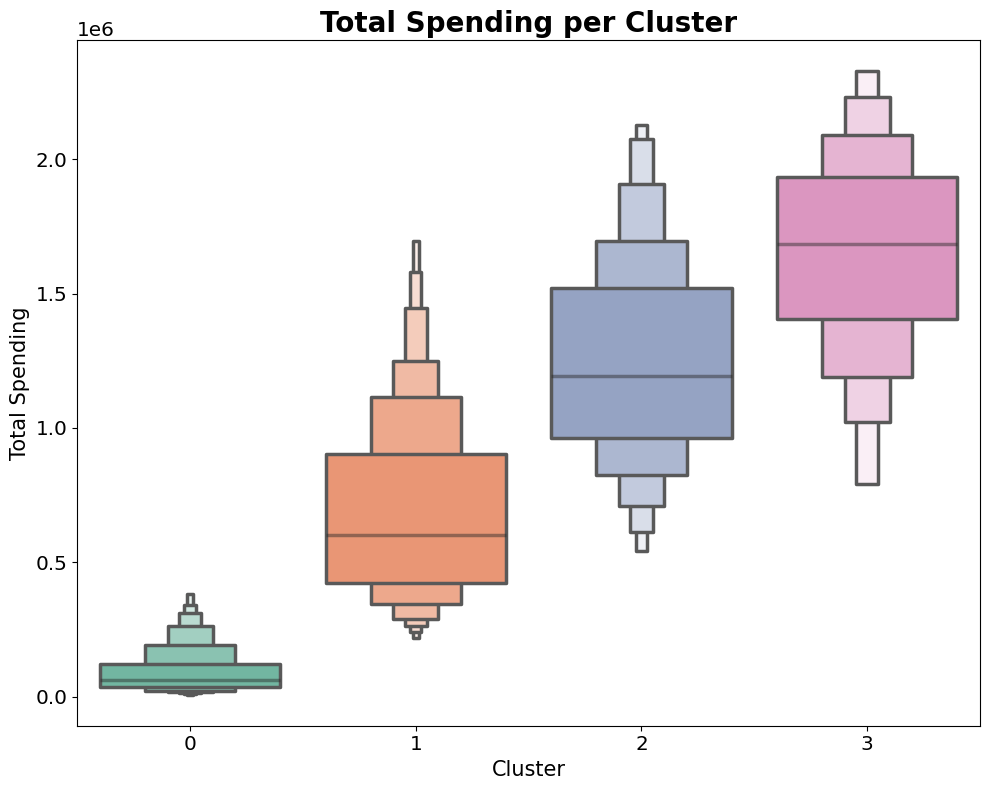

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=dfx['cluster'], y=dfx['Total_Amount'], palette='Set2',  showfliers=False)

plt.title('Total Spending per Cluster', fontsize=20, fontweight='bold')
plt.ylabel('Total Spending', fontsize=15)
plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()

### Total Web Visit per Cluster

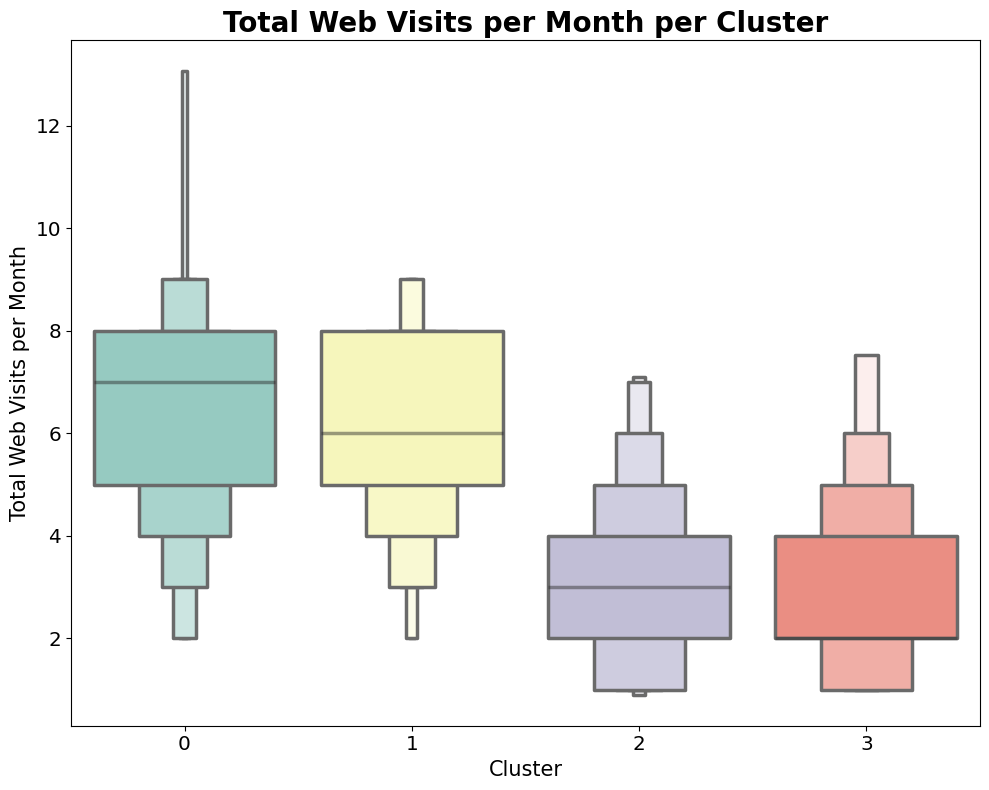

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=dfx['cluster'], y=dfx['NumWebVisitsMonth'], palette='Set3',  showfliers=False)

plt.title('Total Web Visits per Month per Cluster', fontsize=20, fontweight='bold')
plt.ylabel('Total Web Visits per Month', fontsize=15)
plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()

### CVR per Cluster

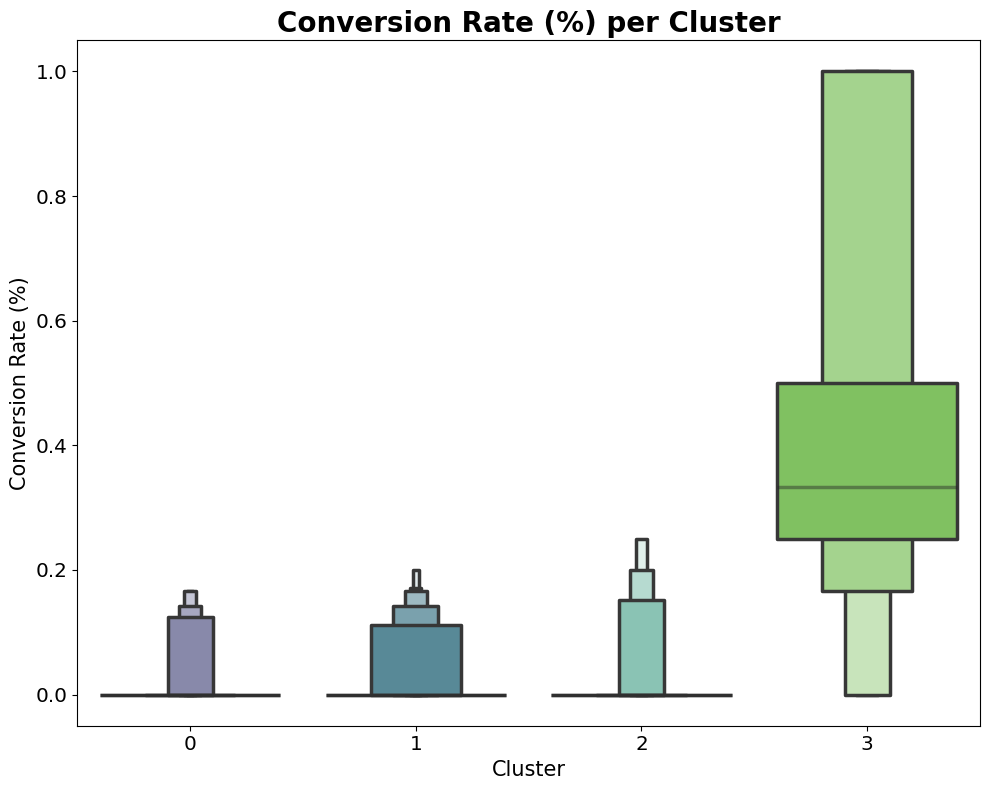

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=dfx['cluster'], y=dfx['Conversion_Rate'], palette='viridis',  showfliers=False)

plt.title('Conversion Rate (%) per Cluster', fontsize=20, fontweight='bold')
plt.ylabel('Conversion Rate (%)', fontsize=15)
plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()

### Distribution of Children per Cluster

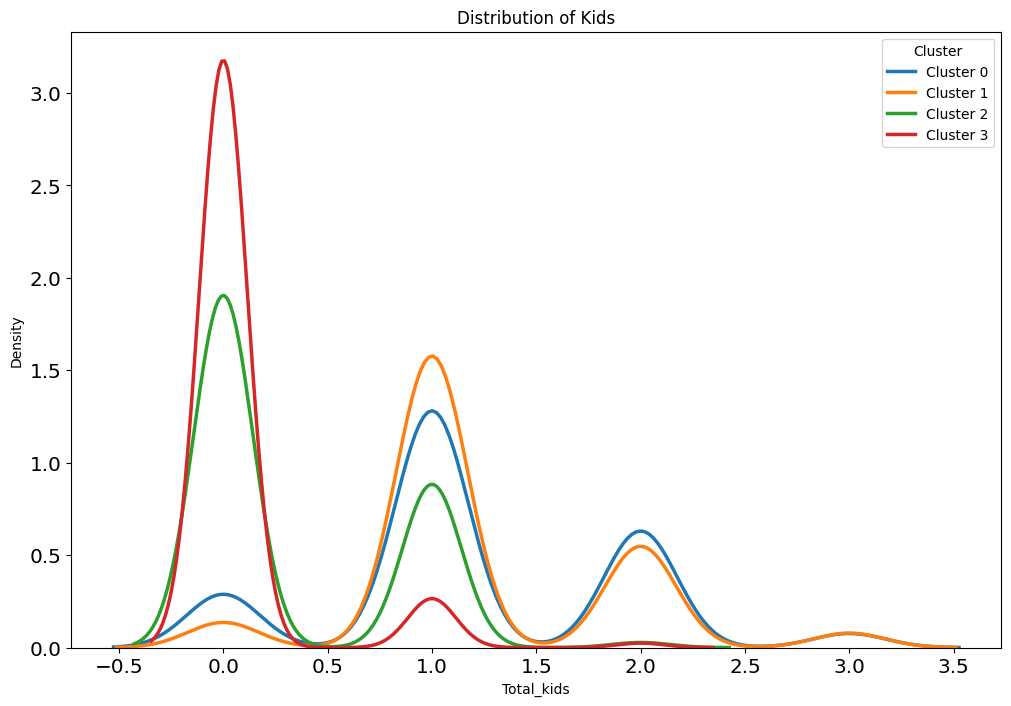

In [ ]:
plt.figure(figsize = (12, 8))

sns.kdeplot(dfx.loc[dfx['cluster'] == 0, 'Total_Children'])
sns.kdeplot(dfx.loc[dfx['cluster'] == 1, 'Total_Children'])
sns.kdeplot(dfx.loc[dfx['cluster'] == 2, 'Total_Children'])
sns.kdeplot(dfx.loc[dfx['cluster'] == 3, 'Total_Children'])

# Labeling of plot

plt.xlabel('Total_kids')
plt.ylabel('Density')
plt.title('Distribution of Kids')
plt.legend(labels=["Cluster 0","Cluster 1","Cluster 2","Cluster 3"], title = "Cluster")

plt.show()

### Distribution of Age per Cluster

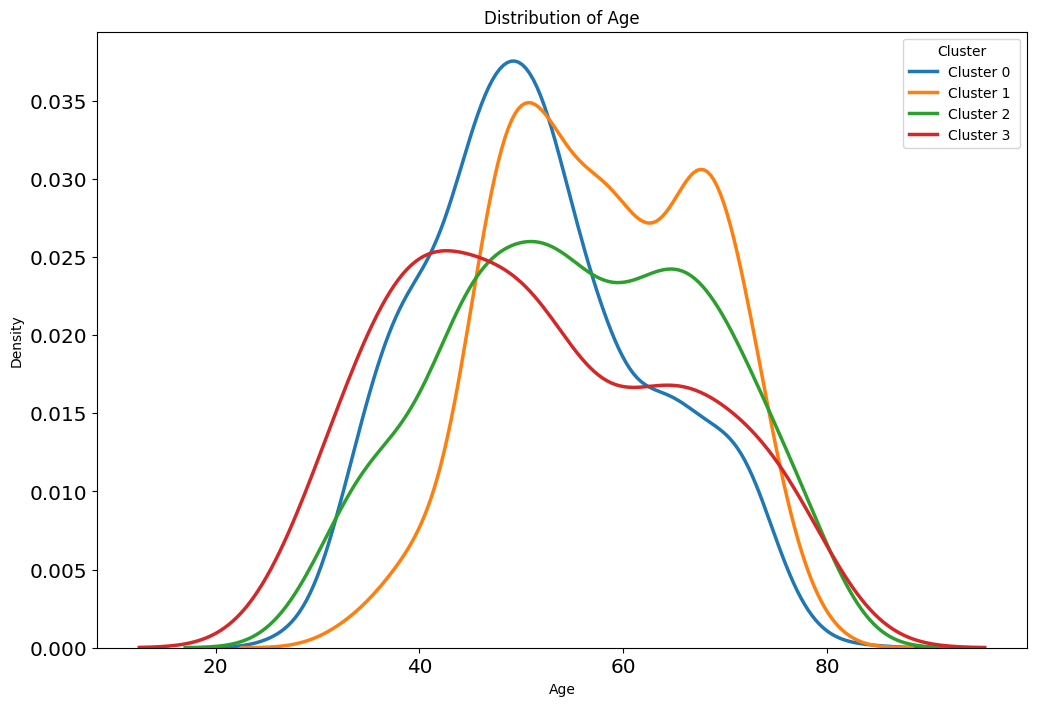

In [ ]:
plt.figure(figsize = (12, 8))

sns.kdeplot(dfx.loc[dfx['cluster'] == 0, 'Age'])
sns.kdeplot(dfx.loc[dfx['cluster'] == 1, 'Age'])
sns.kdeplot(dfx.loc[dfx['cluster'] == 2, 'Age'])
sns.kdeplot(dfx.loc[dfx['cluster'] == 3, 'Age'])

# Labeling of plot

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age')
plt.legend(labels=["Cluster 0 ","Cluster 1","Cluster 2","Cluster 3"], title = "Cluster")
plt.show()

## Choosing a cluster
to be marketed retargetting

1. **Cluster 0 (Risk of Churn)**

> The largest number of customers compared to other clusters. The amount of income and spending is the smallest among the existing clusters. However, this group visits the website the most, although they rarely make transactions. The response to the campaign is also low, which means they make transactions organically.

> For this group it is necessary to look again at the behavior towards the product. Is the product not suitable or there may be price sensitivity. It is hoped that this group can conduct transactions more frequently.

2. **Cluster 1 (Mid Spenders)**

> Has the second largest total income and spending. This group rarely visits the platform but quite often responds to the campaigns that are being carried out. Actually this group should have a high conversion rate, but with a smaller amount of spending. They have a fairly large average use of promos compared to 'High Spenders'.

> Must focus on finding purchasing interests from groups so that it is optimized to make transactions without using coupons to be able to increase revenue. Can perform further analysis in order to make more frequent transactions, perhaps by providing more personalized recommendations. Analysis can also make promotions that may be of interest to this group.

3. **Cluster 2 (Low Spenders)**

> Has a smaller spending compared to 'Mid Spender' and High Spender'. This group tends to visit the web/platform quite often and look for promos, even though the number of promos used is not as much as 'Mid Spender'.

> Can make product recommendations that are more personal with appropriate promos in order to increase transactions for this customer group.

4. **Cluster 3 (High Spenders)**

> Has the largest total income and total spending among other clusters, even though it is included in the cluster with the smallest number of customers. The conversion rate for this group is also the largest, which means that customers in this cluster rarely visit the website but once visited they can make a large number of transactions.

> It is necessary to retarget this group so that they retain and continue to transact. Can also monitor transactions and retention. Also focus on improving services and services so that customer groups do not churn.

## Calculate the potential impact
from the results of marketing retargetting from existing clusters

> The impact of this marketing targeting can increase total transactions, conversion rates and also revenue.

1. Transaction

In [ ]:
print('Total Transaction Cluster 0:', df_c0['Total_Purchases'].sum())
print('Total Transaction Cluster 1:', df_c1['Total_Purchases'].sum())
print('Total Transaction Cluster 2:', df_c2['Total_Purchases'].sum())
print('Total Transaction Cluster 3:', df_c3['Total_Purchases'].sum())

Total Transaction Cluster 0: 7822
Total Transaction Cluster 1: 11761
Total Transaction Cluster 2: 10710
Total Transaction Cluster 3: 2973


In [ ]:
transaction.round(0).T

,0,1,2,3
mean_transaction,8.0,21.0,21.0,21.0
median_transaction,7.0,20.0,21.0,20.0
min_transaction,0.0,10.0,1.0,12.0
max_transaction,17.0,39.0,44.0,32.0


> For clusters 1, 2 and 3, with this marketing targeting it is hoped that customers in these clusters will be able to make more transactions with an average of 21 transactions per person.

2. Conversion Rate

In [ ]:
cvr.round(1).T

,0,1,2,3
mean_cvr_%,1.2,2.0,1.6,46.0
median_cvr_%,0.0,0.0,0.0,33.3
min_cvr_%,0.0,0.0,0.0,0.0
max_cvr_%,25.0,25.0,33.3,100.0


> Customers in cluster 3 are expected to have a large conversion rate up to a maximum of 1 point. As for the other clusters, it is necessary to make adjustments to their marketing content, which is expected to increase the conversion rate.

3. Revenue

In [ ]:
print('Total GMV Cluster 0:', df_c0['Total_Amount'].sum())
print('Total GMV Cluster 1:', df_c1['Total_Amount'].sum())
print('Total GMV Cluster 2:', df_c2['Total_Amount'].sum())
print('Total GMV Cluster 3:', df_c3['Total_Amount'].sum())

Total GMV Cluster 0: 94677000
Total GMV Cluster 1: 390008000
Total GMV Cluster 2: 632554000
Total GMV Cluster 3: 237809000


> With this retargeting marketing, you can get Gross Merchandise Value (GMV) on a 'High Spender' of IDR 237,809,000, on a 'Mid Spender' of IDR 632,469,000, on a 'Low Spender' of IDR 389,252,000, and a 'Risk of Churn' ' amounting to IDR 95,518,000.